```
读取数据并查看基本信息

处理离散特征

处理缺失值

进行数据可视化
```

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

数据前5行：
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0

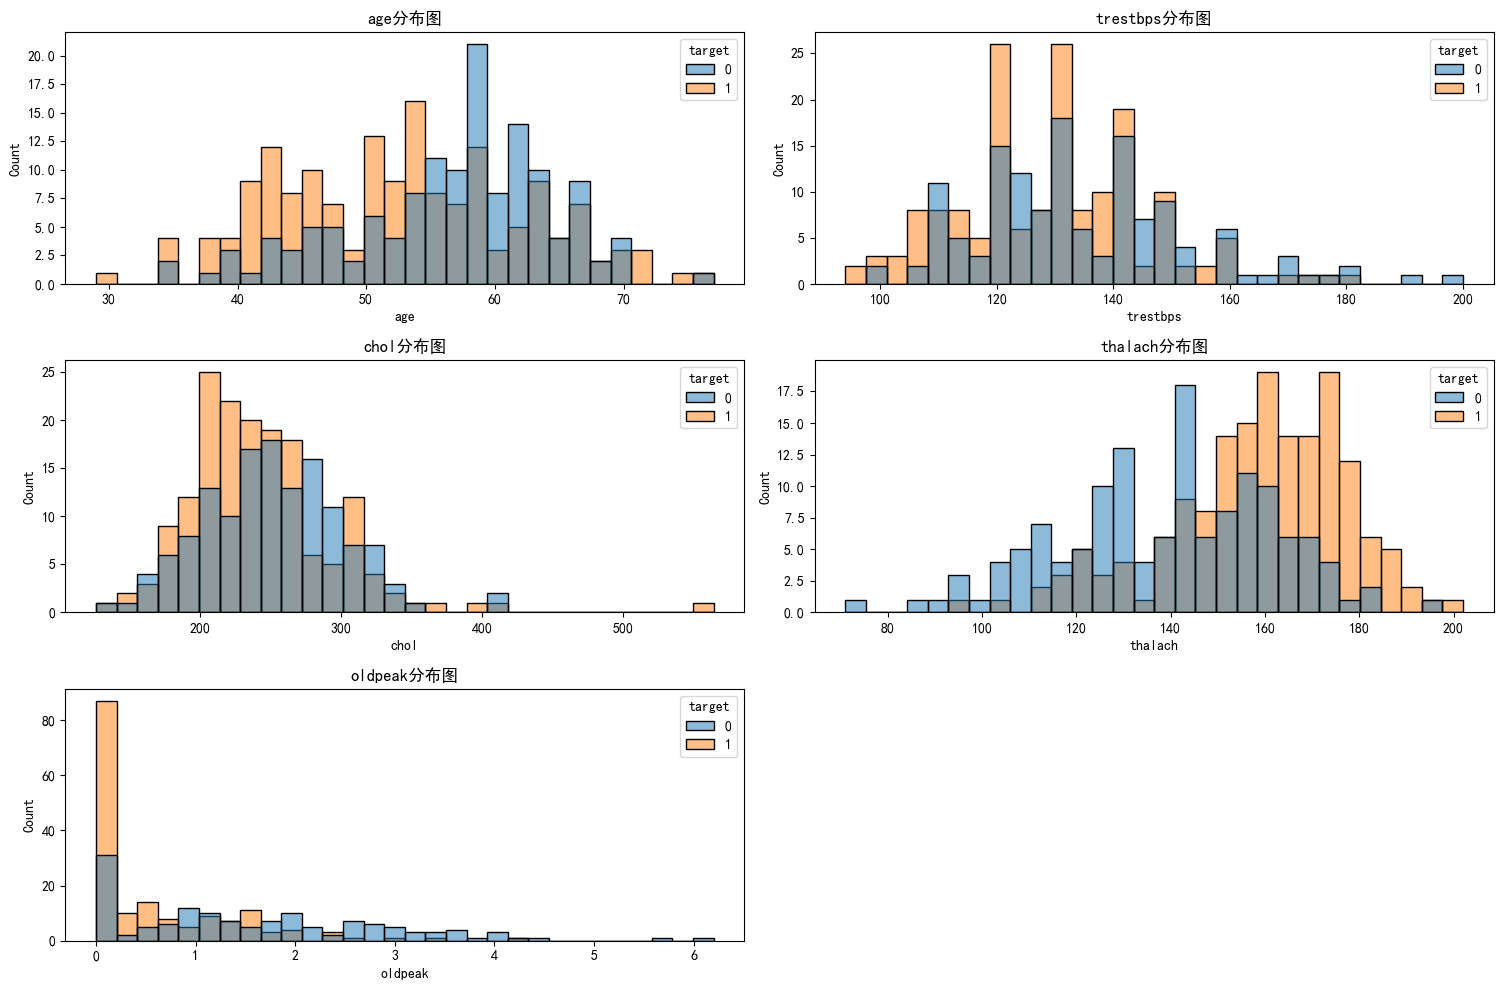

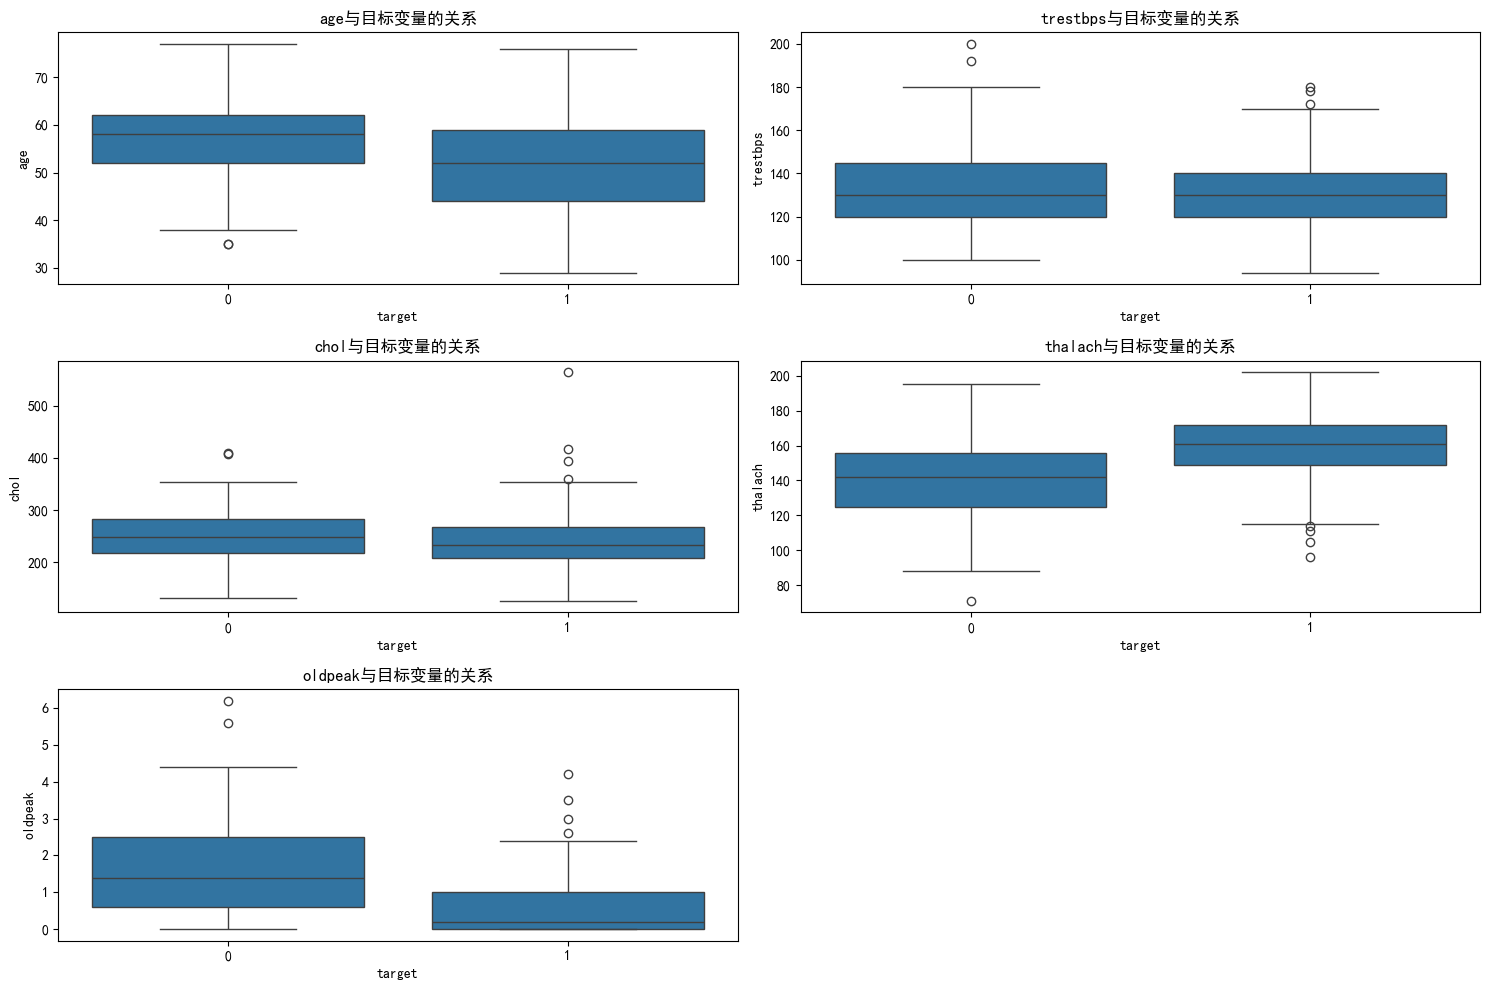


处理后的特征： ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0', 'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3']


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 1. 读取数据
data = pd.read_csv('heart.csv')

# 2. 查看数据基本信息
print("数据基本信息：")
print(data.info())
print("\n数据前5行：")
print(data.head())
print("\n数据基本统计量：")
print(data.describe())

# 3. 检查缺失值
print("\n缺失值统计：")
print(data.isnull().sum())

# 4. 找出离散特征和连续特征
discrete_features = []
continuous_features = []
for feature in data.columns:
    if data[feature].dtype == 'object' or (data[feature].nunique() < 10 and feature != 'target'):
        discrete_features.append(feature)
    elif feature != 'target':
        continuous_features.append(feature)

print("\n离散特征：", discrete_features)
print("连续特征：", continuous_features)

# 5. 对离散特征进行独热编码
data = pd.get_dummies(data, columns=discrete_features)

# 6. 数据可视化
# 6.1 连续特征的分布
plt.figure(figsize=(15, 10))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=data, x=feature, hue='target', bins=30)
    plt.title(f'{feature}分布图')
plt.tight_layout()
plt.show()

# 6.2 连续特征与目标变量的箱线图
plt.figure(figsize=(15, 10))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='target', y=feature, data=data)
    plt.title(f'{feature}与目标变量的关系')
plt.tight_layout()
plt.show()

# 7. 保存处理后的数据
data.to_csv('heart_processed.csv', index=False)
print("\n处理后的特征：", data.columns.tolist())